In [108]:
# Import Dependencies
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [117]:
# Create the Graph class with its methods.
class Graph:
  def __init__(self, nodes, edges, pos=[]):
    self.nodes     = nodes
    self.edges     = edges
    self.pos       = pos
    self.adj_dict  = self.create_adj_dict()
    self.adj_matrix= self.create_adj_matrix()

  def create_adj_dict(self):
    adj_dict = {}
    for start, dist, _ in self.edges:
      if start in adj_dict:
        adj_dict[start].append(dist)
      else:
        adj_dict[start] = [dist]
    return adj_dict

  def create_adj_matrix(self):
    matrix = [[0 for _ in self.nodes] for i in self.nodes]
    for route in self.edges:
      start = self.nodes.index(route[0])
      dist  = self.nodes.index(route[1])
      matrix[start][dist] = route[2]
    return matrix

  def get_all_path(self, start, dist, path=[]):
    path = path + [start]
    if start == dist:
      return [path]
    paths= []
    if start not in self.adj_dict:
      return []
    for vertex in self.adj_dict[start]:
      if vertex not in path:
        new_paths = self.get_all_path(vertex, dist, path)
        for p in new_paths:
          paths.append(p)
    return paths

  def distance(self, paths):
    distance = 0
    for i in range(len(paths)):
      for j in range(len(paths[i])-1):
        s_i = self.nodes.index(paths[i][j])
        d_i = self.nodes.index(paths[i][j+1])
        distance += self.adj_matrix[s_i][d_i]
      paths[i].append(distance)
      distance = 0
    return paths

  def get_all_path_cost(self, start, dist):
    paths = self.get_all_path(start, dist)
    paths = self.distance(paths)
    return paths

  def get_shortest_path(self, start, dist, path=[]):
    path = path + [start]
    if start == dist:
      return path
    if start not in self.adj_dict:
      return None
    shortest_path = None
    for vertex in self.adj_dict[start]:
      if vertex not in path:
        n_sp = self.get_shortest_path(vertex, dist, path)
        if n_sp:
          if shortest_path is None or len(n_sp) < len(shortest_path):
            shortest_path = n_sp
    return shortest_path

  def get_shortest_path_cost(self, start, dist):
    path = [self.get_shortest_path(start, dist)]
    path = self.distance(path)
    return path

  def draw_graph(self):
    G = nx.DiGraph()
    for i in range(len(self.nodes)):
      for j in range(i, len(self.nodes)):
        if self.adj_matrix[i][j]:
          G.add_edge(self.nodes[i], self.nodes[j], weight=self.adj_matrix[i][j])

    # group nodes by column
    left_nodes  = self.nodes[:len(self.nodes)//4]
    middle_nodes= self.nodes[len(self.nodes)//4:len(self.nodes)//2]
    right_nodes = self.nodes[len(self.nodes)//2:]

    # set the position according to column (x-coord)
    if not self.pos:
      self.pos = {n: (0, i) for i, n in enumerate(left_nodes)}
      self.pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
      self.pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

    # nodes
    nx.draw_networkx_nodes(G, self.pos, node_size=400)
    # node labels
    nx.draw_networkx_labels(G, self.pos, font_size=10, font_family="sans-serif")

    # edges
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
    nx.draw_networkx_edges(G, self.pos, edgelist=elarge, width=3)
    nx.draw_networkx_edges(
        G, self.pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
    )
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, self.pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [118]:
nodes= ['A', 'B', 'C', 'D', 'E', 'F']
posations= {'A':(4,4), 'B':(8,2), 'C':(8,6), 'D':(12,2), 'E':(12,6), 'F':(16,4)}
routes=[
    ('A', 'B', 2),
    ('A', 'C', 2),
    ('B', 'C', 4),
    ('B', 'D', 5),
    ('B', 'E', 7),
    ('C', 'E', 5),
    ('D', 'E', 6),
    ('D', 'F', 3),
    ('E', 'F', 3),
]

In [119]:
my_graph = Graph(nodes, routes, posations)

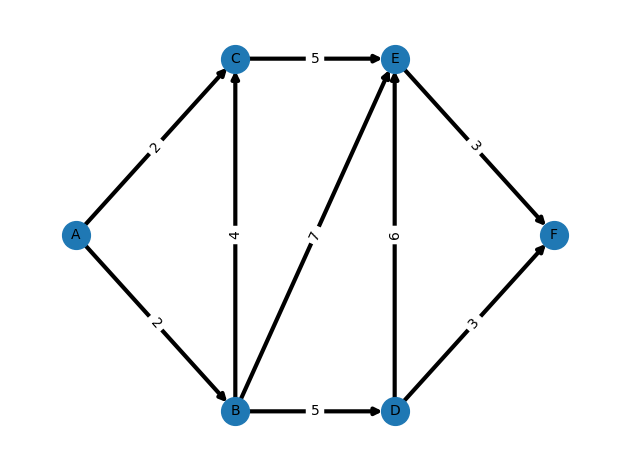

In [120]:
my_graph.draw_graph()

In [121]:
my_graph.adj_matrix

[[0, 2, 2, 0, 0, 0],
 [0, 0, 4, 5, 7, 0],
 [0, 0, 0, 0, 5, 0],
 [0, 0, 0, 0, 6, 3],
 [0, 0, 0, 0, 0, 3],
 [0, 0, 0, 0, 0, 0]]

In [122]:
my_graph.adj_dict

{'A': ['B', 'C'],
 'B': ['C', 'D', 'E'],
 'C': ['E'],
 'D': ['E', 'F'],
 'E': ['F']}

In [123]:
my_graph.get_all_path_cost('A', 'F')

[['A', 'B', 'C', 'E', 'F', 14],
 ['A', 'B', 'D', 'E', 'F', 16],
 ['A', 'B', 'D', 'F', 10],
 ['A', 'B', 'E', 'F', 12],
 ['A', 'C', 'E', 'F', 10]]

In [124]:
my_graph.get_shortest_path_cost('A', 'F')

[['A', 'B', 'D', 'F', 10]]